<h1>Capstone 1</h1>
<h2>White Wine Quality, Randomized Search Cross Validation</h2> 
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)
<h4>Audrey Rager</h4>
<h4>January 20, 2021</h4>


<h2>Import Python Packages</h2>

In [65]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pprint import pprint
%matplotlib inline

sns.set_style('whitegrid')

In [66]:
#Import csv files into Pandas data frames
df = pd.read_csv('winequality-white.csv',sep=";")

#Rename colunms to remove spaces
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)



### Train-Test-Split

In [67]:
#Independent variables (X) = everything but the target variable, y
#Target variable, y, is quality

#Set X to all the input variables (everything except 'quality')
X = df.drop('quality',axis=1)

#Set the variable to be predicted (y) to 'quality'
y = df['quality']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


### Scale Independent Variables

In [69]:
# applying Standard Scaling to the dataset to scale all the field values to same scale (approx.).

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

# Randomized Search CV

In [70]:
# number of trees
n_estimators=[3, 5, 10, 20]

# maximum number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [3, 5, 10, 20]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 50, 100]



In [71]:
# Set the grid_param variable for input into GridSearchCV
grid_param = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [72]:
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestRegressor(random_state=1)
rfr_random = RandomizedSearchCV(estimator = rfr,
                               param_distributions = grid_param, n_iter = 500,
                               cv = 5, verbose = 2, random_state = 42,
                               n_jobs = -1)

In [73]:
rfr_random.fit(X_test,y_test)
print(rfr_random.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2352 tasks      | elapsed:   10.0s


{'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


[Parallel(n_jobs=-1)]: Done 2485 out of 2500 | elapsed:   10.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   10.5s finished


# Instantiate the Random Forest Regressor Model

In [74]:
rfr = RandomForestRegressor(n_estimators = 20, min_samples_split = 5, min_samples_leaf=1, max_depth = 20, max_features = 'log2', random_state = 42)


# Fit the Model to the Training Data

In [75]:
rfrModel = rfr.fit(X_train,y_train)

# Predict Using Test Data

In [76]:
y_pred = rfrModel.predict(X_test)

In [77]:
print(len(y_pred))

980


In [78]:
print(rfr.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[5.48036199]


In [79]:
print(rfrModel.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[5.48036199]


# Evaluate Model

In [80]:
mae_r = mean_absolute_error(y_test,y_pred)
mse_r = mean_squared_error(y_test,y_pred)

In [81]:
print("Mean Absolute Error (MAE):",round(mae_r,4))
print("Mean Squared Error (MSE):",round(mse_r,4))


Mean Absolute Error (MAE): 0.4758
Mean Squared Error (MSE): 0.3902


In [82]:
importance = rfrModel.feature_importances_
importance

array([0.06652165, 0.11286222, 0.06820976, 0.08017346, 0.07543038,
       0.10441327, 0.07600969, 0.13371317, 0.07045948, 0.05893175,
       0.15327517])

In [83]:
type(y_test)


pandas.core.series.Series

In [52]:
print(len(y_test))

980


In [85]:
y_test

4656    7
3659    8
907     8
4352    5
3271    7
       ..
3207    6
1539    6
964     6
168     5
3661    6
Name: quality, Length: 980, dtype: int64

In [86]:
type(y_pred)
print(len(y_pred))

980


In [87]:
y_pred

array([6.21805556, 7.41345238, 6.77949114, 5.31011905, 6.77916667,
       6.34166667, 5.17666667, 5.60916667, 5.7019281 , 5.315     ,
       6.72424242, 5.18103427, 6.55428571, 5.45430036, 6.54946429,
       5.18832505, 7.33833333, 5.8775    , 6.701536  , 5.90207718,
       5.45103535, 5.74095833, 5.26950758, 6.05616162, 5.88958333,
       5.44382295, 5.08216514, 6.26074074, 6.83081502, 5.35555556,
       5.13333333, 5.52468434, 5.66454518, 5.61576867, 5.4175    ,
       6.60553873, 6.27854167, 5.55023196, 5.13333333, 5.72083333,
       5.42875739, 5.58558201, 6.01428571, 5.62916667, 5.16097222,
       5.82400344, 5.73958333, 5.55204545, 5.33676248, 5.12916667,
       4.89375   , 5.71166667, 5.69369048, 6.17981998, 6.20416667,
       6.16959496, 6.25138439, 5.91369048, 5.83541667, 6.13409091,
       6.06555328, 6.35892857, 5.66607143, 6.87261905, 5.85603175,
       6.31233677, 5.77071429, 5.59666667, 5.98700828, 5.64958333,
       4.94082207, 6.03898194, 4.91559524, 4.74077381, 5.97291

In [88]:
# converting the NumPy array, y_pred
# to a Pandas series, y_pred_series
y_pred_series = pd.Series(y_pred)  
  
# displaying the Pandas series 
print("Pandas Series : ") 
type(y_pred_series)

Pandas Series : 


pandas.core.series.Series

In [89]:
y_pred_series

0      6.218056
1      7.413452
2      6.779491
3      5.310119
4      6.779167
         ...   
975    5.820714
976    5.902072
977    5.485152
978    5.364964
979    5.832143
Length: 980, dtype: float64

In [95]:
# Convert each series to a dataframe
df_y_test = pd.DataFrame(data=y_test.values, columns=['test'])
df_y_pred = pd.DataFrame(data=y_pred_series.values, columns=['pred'])
df_y_test_pred = pd.merge(df_y_test, df_y_pred, left_index=True, right_index=True)

In [96]:
type(df_y_test_pred)

pandas.core.frame.DataFrame

In [97]:
df_y_test_pred.head()

,test,pred
0,7,6.218056
1,8,7.413452
2,8,6.779491
3,5,5.310119
4,7,6.779167


In [98]:
len(df_y_test_pred)

980

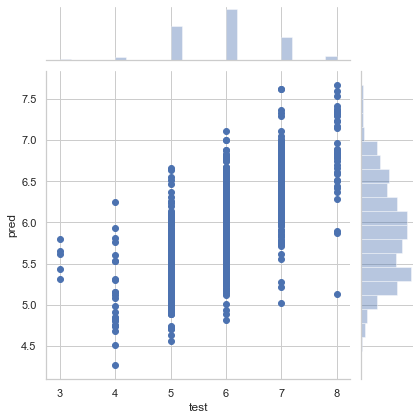

In [108]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(data=df_y_test_pred,x='test', y='pred',  kind='scatter')
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'marginal_ticks'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


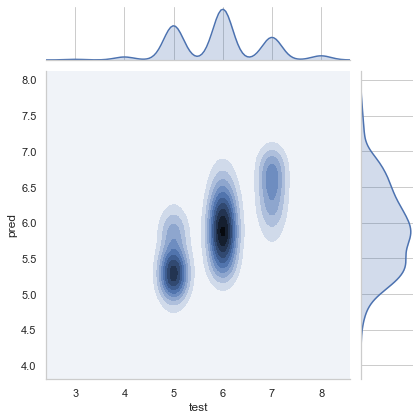

In [106]:


sns.set(style="whitegrid", color_codes=True)
sns.jointplot(data=df_y_test_pred,x='test', y='pred',  kind='kde', marginal_ticks=True)
plt.show()


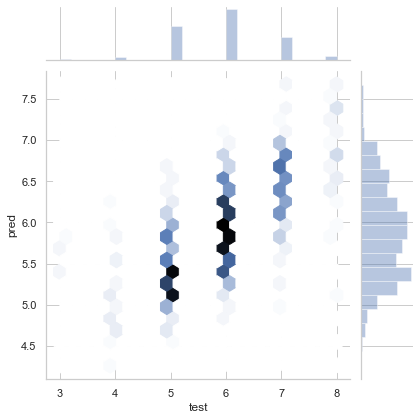

In [104]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(data=df_y_test_pred,x='test', y='pred',  kind='hex')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

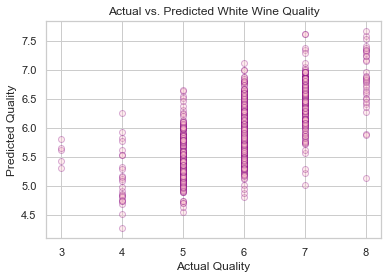

In [102]:
# Actual vs. Predicted White White Quality Scatter Plot
plt.scatter(y_test,y_pred,alpha=0.3, marker='o', color='pink', edgecolors='purple')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted White Wine Quality')
plt.show

In [39]:
columns = X.columns

In [40]:
rfrGraph = pd.Series(importance,columns)
rfrGraph

fixed_acidity           0.057160
volatile_acidity        0.112130
citric_acid             0.072450
residual_sugar          0.064039
chlorides               0.062287
free_sulfur_dioxide     0.122044
total_sulfur_dioxide    0.074067
density                 0.068134
pH                      0.063405
sulphates               0.073734
alcohol                 0.230550
dtype: float64

[Text(0.5, 1.0, 'White Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)')]

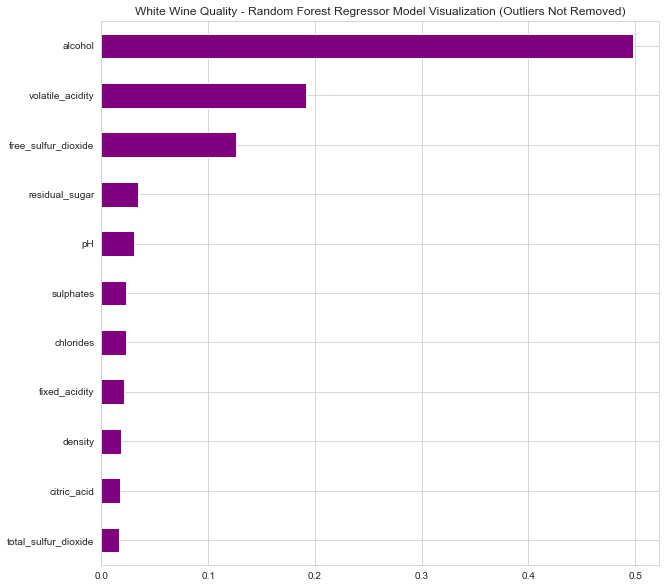

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

rfrGraph.sort_values().plot.barh(color="purple")

[plt.title("White Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)")]